# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
def importData(filename_1, filename_2):
    """
    Fungsi untuk import data dan hapus duplikat
    :param filename <str> : nama file input (.csv)
    :return df <pandas.df>: sampel data
    """
    
    # merge and print data
    credit = pd.read_csv('credit_record.csv')
    application = pd.read_csv('application_record.csv')
    data = pd.merge(credit, application, how='inner')
    print("data asli         = ", data.shape, "- obeservasi, kolom")
    
    # drop duplicates
    data = data.drop_duplicates()
    print("data setelah drop = ", data.shape, "- obeservasi, kolom") 
    
    return data

# (filename) adalah argumen
# Argumen adalah sebuah variable. 
# Jika fungsi tsb diberi argumen filename1 = "credit_data.csv" dan filename2 = "application_record.csv", 
# maka semua variabel 'filename 1 dan 2' di dalam fungsi 
# akan berubah menjadi gabungan dari "credit_data.csv" dan application_record.csv

In [3]:
#input
file_credit = "credit_record.csv"
file_application = "application_record.csv"

#panggil fungsi
data = importData(filename_1 = file_credit, filename_2 = file_application)

data asli         =  (777715, 20) - obeservasi, kolom
data setelah drop =  (777715, 20) - obeservasi, kolom


In [4]:
# Data Preprocessing
# Fitur y adalah output variable dan sisanya adalah input
data.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [5]:
data.STATUS.value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

# Define Target and Feature

In [6]:
"""
Membagi target menjadi 2 kelompok

Data yang termasuk bad status
0: 1-29 days past due 
1: 30-59 days past due 
2: 60-89 days overdue 
3: 90-119 days overdue 
4: 120-149 days overdue 
5: Overdue or bad debts, write-offs for more than 150 days 

Data yang termasuk good status
X: No loan for the month
C: paid off that month

"""

bad_status = ['0','1','2','3','4','5']

# membuat kolom baru yang berisi flag yang mendindikasikan seseorang adalah bad atau good

data['bad_flag'] = np.where(data['STATUS'].isin(bad_status), 1, 0)
data.drop('STATUS', axis=1, inplace=True)

In [7]:
data.bad_flag.value_counts(normalize=True)

0    0.611388
1    0.388612
Name: bad_flag, dtype: float64

In [8]:
def extractIO(data,
             output_column_name):
    """
    Fungsi untuk memisahkan output dan input
    :param data <pandas.df> : data seluruh sample
    :param output_column_name <str> : nama kolom output
    :return input_data: <pandas dataframe> data input
    :return output_data: <pandas series> data output
    """
    
    # drop data
    #data = data.drop(columns = column_to_drop)
    output_data = data[output_column_name]
    input_data = data.drop(output_column_name,
                          axis = 1)
    
    return input_data, output_data

# (data, output_column_name) adalah argumen
# Argumen adalah sebuah variable. 
# Jika fungsi tsb. diberi argumen data = credit_data dan application_data, 
# maka semua variabel 'data' di dalam fungsi akan berubah menjadi credit_data application_data

# Cleaning, Preprocessing, Feature Engineering

In [9]:
#column_to_drop = ["Unnamed: 0"]
output_column_name = ['bad_flag']

X, y = extractIO(data = data,
                 output_column_name = output_column_name)

In [10]:
#sanitiCheck
X

,ID,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,-25,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777711,5150487,-26,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777712,5150487,-27,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777713,5150487,-28,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0


In [11]:
data[data.bad_flag==1]

,ID,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,bad_flag
13,5008804,-13,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
14,5008804,-14,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
28,5008805,-12,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
29,5008805,-13,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
39,5008806,-8,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777680,5150484,-10,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0,1
777681,5150484,-11,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0,1
777682,5150484,-12,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0,1
777683,5150485,0,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0,1


In [12]:
#check proporsi data melalu value_counts

for i in X.columns:
    print(i, ':', len(X[i].value_counts()))

ID : 36457
MONTHS_BALANCE : 61
CODE_GENDER : 2
FLAG_OWN_CAR : 2
FLAG_OWN_REALTY : 2
CNT_CHILDREN : 9
AMT_INCOME_TOTAL : 265
NAME_INCOME_TYPE : 5
NAME_EDUCATION_TYPE : 5
NAME_FAMILY_STATUS : 5
NAME_HOUSING_TYPE : 6
DAYS_BIRTH : 7183
DAYS_EMPLOYED : 3640
FLAG_MOBIL : 1
FLAG_WORK_PHONE : 2
FLAG_PHONE : 2
FLAG_EMAIL : 2
OCCUPATION_TYPE : 18
CNT_FAM_MEMBERS : 10


In [13]:
# Terdapat data yang hanya berisi 1 nilai
data.FLAG_MOBIL.value_counts()

1    777715
Name: FLAG_MOBIL, dtype: int64

In [14]:
data.MONTHS_BALANCE.value_counts()

-1     24963
-2     24871
 0     24672
-3     24644
-4     24274
       ...  
-56     1588
-57     1253
-58      955
-59      627
-60      321
Name: MONTHS_BALANCE, Length: 61, dtype: int64

In [15]:
# Karena kolom FLAG_MOBIL hanya berisi satu macam data, maka harus didrop

data = data.drop('FLAG_MOBIL', axis=1)

In [16]:
# redefine the input and output after change some values of class in repayment and education
X, y = extractIO(data = data,
                          output_column_name = output_column_name)

In [17]:
#sanity check
X

,ID,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
1,5008804,-1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
2,5008804,-2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
3,5008804,-3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
4,5008804,-4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,-25,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,0,0,0,Drivers,2.0
777711,5150487,-26,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,0,0,0,Drivers,2.0
777712,5150487,-27,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,0,0,0,Drivers,2.0
777713,5150487,-28,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,0,0,0,Drivers,2.0


In [18]:
#sanity check
y

,bad_flag
0,0
1,0
2,0
3,0
4,0
...,...
777710,0
777711,0
777712,0
777713,0


In [20]:
#Sanity Check hasil splitting
print(X_train.shape)
print(X_test.shape)

(622172, 18)
(155543, 18)


In [21]:
# Mengecek missing value

X_train.isnull().sum()

# Output: nama variabel, jumlah null value.
# Ada 192058 data yang kosong pada occupation_type column 

ID                          0
MONTHS_BALANCE              0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        192058
CNT_FAM_MEMBERS             0
dtype: int64

In [22]:
#_get_numeric_data() hanya akan mengambil column berisikan integer dan float
X_train_numerical = X_train._get_numeric_data() 
X_train_numerical.head()

,ID,MONTHS_BALANCE,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
107051,5025231,-42,2,270000.0,-11505,-4019,0,0,0,3.0
347385,5067129,-17,0,180000.0,-19365,-243,0,0,1,2.0
267420,5053916,-36,0,225000.0,-14438,-2433,0,0,0,2.0
167516,5037305,-1,0,661500.0,-20053,-3422,0,0,0,2.0
679065,5135811,-6,0,90000.0,-19482,-2878,0,0,0,2.0


In [23]:
X_train

,ID,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
107051,5025231,-42,M,N,Y,2,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11505,-4019,0,0,0,Laborers,3.0
347385,5067129,-17,M,N,N,0,180000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-19365,-243,0,0,1,Laborers,2.0
267420,5053916,-36,F,Y,N,0,225000.0,Working,Higher education,Civil marriage,House / apartment,-14438,-2433,0,0,0,Managers,2.0
167516,5037305,-1,F,Y,Y,0,661500.0,Commercial associate,Higher education,Married,House / apartment,-20053,-3422,0,0,0,Accountants,2.0
679065,5135811,-6,F,N,Y,0,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19482,-2878,0,0,0,Laborers,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84434,5023917,-38,M,Y,N,1,225000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-16173,-2862,0,0,0,Managers,3.0
437782,5090400,-2,F,N,N,0,36000.0,Working,Secondary / secondary special,Married,With parents,-14500,-459,1,0,0,Core staff,2.0
620104,5117680,-50,M,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23587,365243,0,0,0,NaN,2.0
203245,5045678,-27,F,N,Y,1,270000.0,State servant,Secondary / secondary special,Civil marriage,House / apartment,-12721,-5252,0,0,0,Medicine staff,3.0


In [25]:
X_train.columns

Index(['ID', 'MONTHS_BALANCE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [26]:
# Buat kolom categoric dan numeric 
numerical_column = ['ID', 'MONTHS_BALANCE',
                    'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
                    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_WORK_PHONE',
                   'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS']
categorical_column = ["CODE_GENDER", "FLAG_OWN_CAR", "CODE_GENDER", "FLAG_OWN_REALTY",
                    "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE",
                    "OCCUPATION_TYPE"]

In [27]:
# Periksa lagi missing value
categorical_data = X_train[categorical_column]
categorical_data.isnull().sum()

CODE_GENDER                 0
FLAG_OWN_CAR                0
CODE_GENDER                 0
FLAG_OWN_REALTY             0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
OCCUPATION_TYPE        192058
dtype: int64

In [28]:
def categoricalImputation(data, categorical_column):
    """
    Fungsi untuk melakukan imputasi data kategorik
    :param data: <pandas dataframe> sample data input
    :param categorical_column: <list> list kolom kategorikal data
    :return categorical_data: <pandas dataframe> data kategorikal
    """
    # seleksi data
    categorical_data = data[categorical_column]

    # lakukan imputasi
    categorical_data = categorical_data.fillna(value="KOSONG")

    return categorical_data

In [29]:
X_train_categorical = categoricalImputation(data = X_train,
                                            categorical_column = categorical_column)

X_train_categorical.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
CODE_GENDER            0
FLAG_OWN_REALTY        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
OCCUPATION_TYPE        0
dtype: int64

In [30]:
categorical_ohe = pd.get_dummies(X_train_categorical)
categorical_ohe.head(2)

,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
107051,0,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
347385,0,1,1,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [31]:
def extractCategorical(data, categorical_column):
    """
    Fungsi untuk ekstrak data kategorikal dengan One Hot Encoding
    :param data: <pandas dataframe> data sample
    :param categorical_column: <list> list kolom kategorik
    :return categorical_ohe: <pandas dataframe> data sample dengan ohe
    """
    data_categorical = categoricalImputation(data = data,
                                             categorical_column = categorical_column)
    categorical_ohe = pd.get_dummies(data_categorical)

    return categorical_ohe

In [32]:
X_train_categorical_ohe = extractCategorical(data = X_train,
                                             categorical_column = categorical_column)

In [33]:
X_train_categorical_ohe.head()

,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
107051,0,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
347385,0,1,1,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
267420,1,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
167516,1,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
679065,1,0,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
# Simpan kolom OHE untuk diimplementasikan dalam testing data

ohe_columns = X_train_categorical_ohe.columns

In [35]:
ohe_columns

Index(['CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_REALTY_N',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apar

In [36]:
# Join data Numerical dan Categorical

X_train_concat = pd.concat([X_train_numerical,
                            X_train_categorical_ohe],
                           axis = 1)

In [37]:
X_train_categorical_ohe

,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
107051,0,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
347385,0,1,1,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
267420,1,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
167516,1,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
679065,1,0,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84434,0,1,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
437782,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
620104,0,1,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
203245,1,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
X_train_concat.shape

(622172, 58)

In [39]:
X_train_concat.isnull().any()

ID                                                   False
MONTHS_BALANCE                                       False
CNT_CHILDREN                                         False
AMT_INCOME_TOTAL                                     False
DAYS_BIRTH                                           False
DAYS_EMPLOYED                                        False
FLAG_WORK_PHONE                                      False
FLAG_PHONE                                           False
FLAG_EMAIL                                           False
CNT_FAM_MEMBERS                                      False
CODE_GENDER_F                                        False
CODE_GENDER_M                                        False
FLAG_OWN_CAR_N                                       False
FLAG_OWN_CAR_Y                                       False
CODE_GENDER_F                                        False
CODE_GENDER_M                                        False
FLAG_OWN_REALTY_N                                    Fal

In [40]:
from sklearn.preprocessing import StandardScaler

# Buat fungsi normalisasi

def standardizerData(data):
    """
    Fungsi untuk melakukan standarisasi data
    :param data: <pandas dataframe> sampel data
    :return standardized_data: <pandas dataframe> sampel data standard
    :return standardizer: method untuk standardisasi data
    """
    data_columns = data.columns
    data_index = data.index
    
    # buat fit standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)
    
    # transform_data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index
    
    return standardized_data, standardizer

In [41]:
X_train_clean, standardizer = standardizerData(data = X_train_concat)
X_train_clean

,ID,MONTHS_BALANCE,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
107051,-1.279930,-1.608124,2.105599,0.799947,1.126817,-0.453049,-0.549064,-0.656231,-0.317533,0.871836,...,2.217176,-0.068254,-0.309035,-0.188831,-0.094179,-0.040563,-0.315095,-0.064038,-0.127322,-0.057214
347385,-0.277644,0.167954,-0.573018,-0.084734,-0.788600,-0.425391,-0.549064,-0.656231,3.149282,-0.229352,...,2.217176,-0.068254,-0.309035,-0.188831,-0.094179,-0.040563,-0.315095,-0.064038,-0.127322,-0.057214
267420,-0.593726,-1.181865,-0.573018,0.357606,0.412069,-0.441432,-0.549064,-0.656231,-0.317533,-0.229352,...,-0.451024,-0.068254,3.235882,-0.188831,-0.094179,-0.040563,-0.315095,-0.064038,-0.127322,-0.057214
167516,-0.991096,1.304644,-0.573018,4.648313,-0.956260,-0.448676,-0.549064,-0.656231,-0.317533,-0.229352,...,-0.451024,-0.068254,-0.309035,-0.188831,-0.094179,-0.040563,-0.315095,-0.064038,-0.127322,-0.057214
679065,1.365369,0.949428,-0.573018,-0.969416,-0.817112,-0.444691,-0.549064,-0.656231,-0.317533,-0.229352,...,2.217176,-0.068254,-0.309035,-0.188831,-0.094179,-0.040563,-0.315095,-0.064038,-0.127322,-0.057214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84434,-1.311364,-1.323951,0.766290,0.357606,-0.010736,-0.444574,-0.549064,-0.656231,-0.317533,0.871836,...,-0.451024,-0.068254,3.235882,-0.188831,-0.094179,-0.040563,-0.315095,-0.064038,-0.127322,-0.057214
437782,0.279045,1.233601,-0.573018,-1.500225,0.396960,-0.426973,1.821283,-0.656231,-0.317533,-0.229352,...,-0.451024,-0.068254,-0.309035,-0.188831,-0.094179,-0.040563,-0.315095,-0.064038,-0.127322,-0.057214
620104,0.931639,-2.176469,-0.573018,-0.305905,-1.817467,2.251693,-0.549064,-0.656231,-0.317533,-0.229352,...,-0.451024,-0.068254,-0.309035,-0.188831,-0.094179,-0.040563,-0.315095,-0.064038,-0.127322,-0.057214
203245,-0.790796,-0.542477,0.766290,0.799947,0.830488,-0.462080,-0.549064,-0.656231,-0.317533,0.871836,...,-0.451024,-0.068254,-0.309035,5.295749,-0.094179,-0.040563,-0.315095,-0.064038,-0.127322,-0.057214


In [42]:
# Menentukan baseline

data['bad_flag'].value_counts(normalize=True)*100

0    61.138849
1    38.861151
Name: bad_flag, dtype: float64

In [43]:
# baseline akurasi = 61%

# Training & Modeling

In [19]:
# Import train-test splitting library dari sklearn (scikit learn)
from sklearn.model_selection import train_test_split

"""
1. `X` adalah input
2. `y` adalah output (target)
3. `test_size` adalah seberapa besar proporsi data test dari keseluruhan data. Contoh `test_size = 0.2` artinya data test akan berisi 20% data.
4. `random_state` adalah kunci untuk random. Harus di-setting sama. Misal `random_state = 123`.
5. Output:
   - `X_train` = input dari data training
   - `X_test` = input dari data testing
   - `y_train` = output dari data training
   - `y_test` = output dari data testing
6. Urutan outputnya: `X_train, X_test, y_train, y_test`. Tidak boleh terbalik
"""

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 2
                                                    )

In [44]:
# Import dari sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Model Random Forest Classifier
random_forest = RandomForestClassifier(random_state = 123)
random_forest.fit(X_train_clean, y_train)

# Model Random Forest Classifier 1
# Mari kita ubah hyperparameter dari random forest --> n_estimator
# Tambahkan n_estimator = 350

random_forest_1 = RandomForestClassifier(random_state = 123,
                                         n_estimators = 350)
random_forest_1.fit(X_train_clean, y_train)

predicted_rf = pd.DataFrame(random_forest.predict(X_train_clean))
predicted_rf.head()

<ipython-input-45-d6e6e8fd5424>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train_clean, y_train)
<ipython-input-45-d6e6e8fd5424>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_1.fit(X_train_clean, y_train)


,0
0,0
1,0
2,0
3,0
4,0


In [46]:
predicted_rf = pd.DataFrame(random_forest.predict(X_train_clean))
predicted_rf.value_counts()

0    380390
1    241782
dtype: int64

In [47]:
random_forest.score(X_train_clean, y_train)

0.99996785454826

In [48]:
random_forest_1.score(X_train_clean, y_train)

1.0

In [54]:
def extractTest(data,
                numerical_column, categorical_column, ohe_column, standardizer):
    """
    Fungsi untuk mengekstrak & membersihkan test data 
    :param data: <pandas dataframe> sampel data test
    :param numerical_column: <list> kolom numerik
    :param categorical_column: <list> kolom kategorik
    :param ohe_column: <list> kolom one-hot-encoding dari data kategorik
    :param imputer_numerical: <sklearn method> imputer data numerik
    :param standardizer: <sklearn method> standardizer data
    :return cleaned_data: <pandas dataframe> data final
    """
    # Filter data
    numerical_data = data[numerical_column]
    categorical_data = data[categorical_column]


    # Proses data kategorik
    categorical_data = categorical_data.fillna(value="KOSONG")
    categorical_data.index = data.index
    categorical_data = pd.get_dummies(categorical_data)
    categorical_data.reindex(index = categorical_data.index, 
                             columns = ohe_column)

    # Gabungkan data
    concat_data = pd.concat([numerical_data, categorical_data],
                             axis = 1)
    cleaned_data = pd.DataFrame(standardizer.transform(concat_data))
    cleaned_data.columns = concat_data.columns

    return cleaned_data

def testPrediction(X_test, y_test, classifier, compute_score):
    """
    Fungsi untuk mendapatkan prediksi dari model
    :param X_test: <pandas dataframe> input
    :param y_test: <pandas series> output/target
    :param classifier: <sklearn method> model klasifikasi
    :param compute_score: <bool> True: menampilkan score, False: tidak
    :return test_predict: <list> hasil prediksi data input
    :return score: <float> akurasi model
    """
    if compute_score:
        score = classifier.score(X_test, y_test)
        print(f"Accuracy : {score:.4f}")

    test_predict = classifier.predict(X_test)

    return test_predict, score


# Testing

In [55]:
# Melakukan Testing

X_test_clean = extractTest(data = X_test,
                           numerical_column = numerical_column,
                           categorical_column = categorical_column,
                           ohe_column = ohe_columns,
                           standardizer = standardizer)

In [56]:
X_test_clean.shape

(155543, 58)

In [58]:
# Random Forest Performance
rf_test_predict, score = testPrediction(X_test = X_test_clean,
                                        y_test = y_test,
                                        classifier = random_forest,
                                        compute_score = True)

Accuracy : 0.9036


In [59]:
# Random Forest 1 Performance
rf_1_test_predict, score = testPrediction(X_test = X_test_clean,
                                          y_test = y_test,
                                          classifier = random_forest_1,
                                          compute_score = True)  

Accuracy : 0.9051


In [61]:
y_pred_proba = random_forest_1.predict_proba(X_test_clean)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

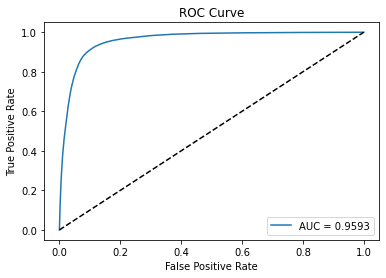

In [62]:
# Melakukan Evaluasi performa dengan AUC

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [63]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.8113')

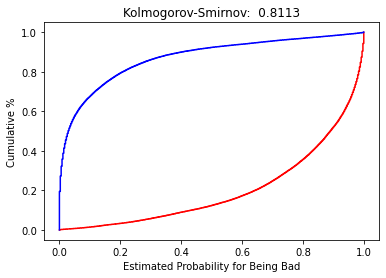

In [64]:
# Melakukan Evaluasi performa dengan KS

KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)